Исследовательский анлиз на основе данных регионального банка - "Метанпром"

Задача исследования: Сегментация пользователей на основании данных о колличестве потребляемых продуктов банка

# Дополнительные материалы:

Презентация:
https://disk.yandex.ru/i/ElDGd3qzLQ3loA

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

# 1. Загрузка данных

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')
import math as mth
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest

In [2]:
client_info = pd.read_csv('/datasets/bank_dataset.csv', sep=',')
display(client_info.head())

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [3]:
client_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


# 2. Предобработка данных

## 2.1 Приведение наименований столбцов к одному регистру

Приведем наименования столбцов к нижнему регистру

In [4]:
client_info.columns = client_info.columns.str.lower()
display(client_info.head())

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


## 2.2 Проверка типов данных

In [5]:
client_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Из анализа данных видим, что все типы данных соотвествуют значению столбцов

## 2.3 Проверка на дубликаты

In [6]:
client_info.drop('userid', axis=1).duplicated().sum()

0

Видим, что дубликатов нет.

## 2.4 Прверка данных на пропуски

In [7]:
client_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


На основании анализа данных видим, что пропуски есть только в столбце "balance"

Посмотрим какой процент нулевых значений

In [8]:
pd.DataFrame(round((client_info.isna().mean()*100),2)).style.background_gradient()

,0
userid,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.000000
objects,0.000000
balance,36.170000
products,0.000000
creditcard,0.000000
loyalty,0.000000


36% записей имеют нулевой баланс по счету

Анализ пропусков

In [9]:
client_info.groupby('churn')['balance'].apply(lambda x: x.isna().sum())

churn
0    3117
1     500
Name: balance, dtype: int64

Из данных видим, что пропусков в данных о балансе больше у оставшихся клиентов банка

Проверим связаты ли пропуски в балансе с использованием клиентом кредитных продуктов

In [10]:
client_info.groupby('creditcard')['balance'].apply(lambda x: x.isna().sum())

creditcard
0    1025
1    2592
Name: balance, dtype: int64

Как показывают данные большое количество клиентов использующих кредитные продукты имеют пробуски в данных о балансе

Проверим пропуски в разрезе количесва используемых продуктов

In [11]:
client_info.groupby('products')['balance'].apply(lambda x: x.isna().sum())

products
1     905
2    2600
3      98
4      14
Name: balance, dtype: int64

Как видим из данных большенство пропусков приходится на клиентов пользующихся двумя продуктами. Если предположить, что в колонке баланс значение на конец периода, то возможно ряд клинтов может иметь нулевой баланс на конец отчетного периода.

Можно предположить, что у данных клиентов отсуствуют банковские продукты при которых есть дебетовый счет. При удалении такх записей мы потеряем большой объем информации, в этом случае исследование может оказаться не информативным. 
Исходя из нашего предположении о возможном отсуствии у ряда клиентов дебетового счета заменим пропуски на 0

In [12]:
client_info['balance'] = client_info['balance'].fillna(0.0)
client_info.isnull().sum()

userid              0
score               0
city                0
gender              0
age                 0
objects             0
balance             0
products            0
creditcard          0
loyalty             0
estimated_salary    0
churn               0
dtype: int64

# 3. Исследовательский анализ данных (EDA)

На данном этапе расмотрим данные более детально, что позволит увидеть нам возможные аномалии

In [13]:
client_info['score'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: score, dtype: float64

Максимальный балл кредитного скоринга составляет 850 единиц, минимальный - 350. Медиана и среднее примерно равны - 652 и 650 соответственно, так что можем предположить, что данные распределены нормально.

In [14]:
client_info['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

Из данных видно, что средний возрас клиентов банка 40 лет

In [15]:
client_info['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

В файле представленны данные о клиентах из трех городов: Ярославля, Ростова Великого и Рыбинска

In [16]:
client_info['gender'].value_counts()

М    5457
Ж    4543
Name: gender, dtype: int64

Отношение мужчин и женщин среди клиентов банка примерно одинаковое. 55% - мужчин и 45% женщин

In [17]:
client_info['objects'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: objects, dtype: float64

Среднее и медиана - 5 объектов. Выбросов, скорее всего, здесь нет.

In [18]:
client_info['products'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: products, dtype: float64

В среднем клинт банка пользуется одним продуктом

In [19]:
client_info['creditcard'].value_counts()

1    7055
0    2945
Name: creditcard, dtype: int64

70% клиентов банка пользуются кредитной картой банка

In [20]:
client_info['loyalty'].value_counts()

1    5151
0    4849
Name: loyalty, dtype: int64

50% клиентов банка являются активными

In [21]:
client_info['estimated_salary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

Из представленных данныъ можно сделать вывод, что средняя заботная плата клиентов банка - 100 тысяч рублей (срорее всего выброосв нет). Данные в графе мин. - 11 рублей срорей всего связаны с ошибкой в заполнении анкеты клиентом банка

In [22]:
client_info['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

Отток среди клиентов банка составляет 20%

In [23]:
display(client_info.agg(['mean','std']))

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
mean,1.573368e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769


In [24]:
v = client_info.agg(['mean','std'])
v.loc[v.index == 'std']/v.loc[v.index == 'mean'].values

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
std,0.004572,0.148577,0.269458,0.576958,0.815803,0.380117,0.646124,0.970291,0.574586,1.977264


На основе анализа данных можно сделать следующие выводы:
1. Для 'objects', 'balance', 'products', 'creditcard', 'loyalty', 'estimated_salary' - выборка вариабельна сильно.
2. Для признака 'score" - выборка вариабельна средне.

Изучим распределение признаков и их зависимоть

In [25]:
def parameters(data, column):
    sns.set_style("darkgrid")
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5),gridspec_kw={'width_ratios': [3, 1]})
    
    min_value = min(data[column])
    max_value = max(data[column])
    bins_range = np.linspace(min_value, max_value, 10)
    sns.distplot(data[column], kde=False, ax=ax1, color='blue', norm_hist=True, bins = bins_range)
    ax1.set_ylabel('Частота')
    ax1.set_xlabel('Параметр'.format(column))
    ax1.set_title("Распределение {}".format(column))
    
    sns.boxplot(y=column, data=data, ax=ax2, color='#6B8E23')
    sns.stripplot(y=column, data=data, jitter=True, zorder=1, color='#9ACD32', ax=ax2, size=2, alpha=0.2)
    ax2.set_title("Для {}".format(column))
    ax2.set_ylabel('Параметр'.format(column))
    plt.show()

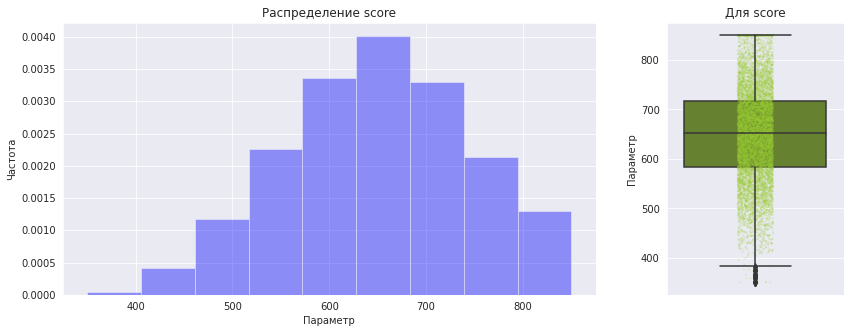

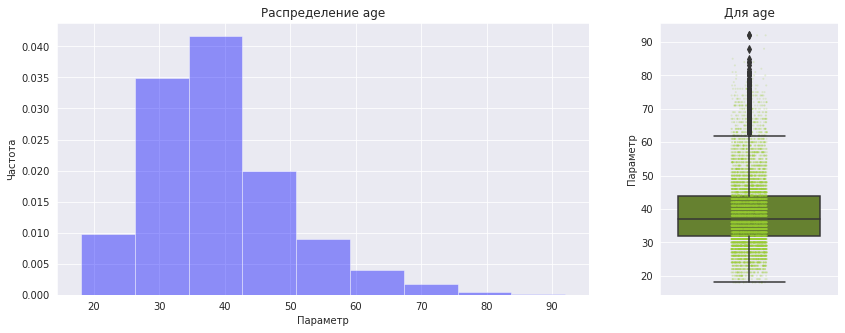

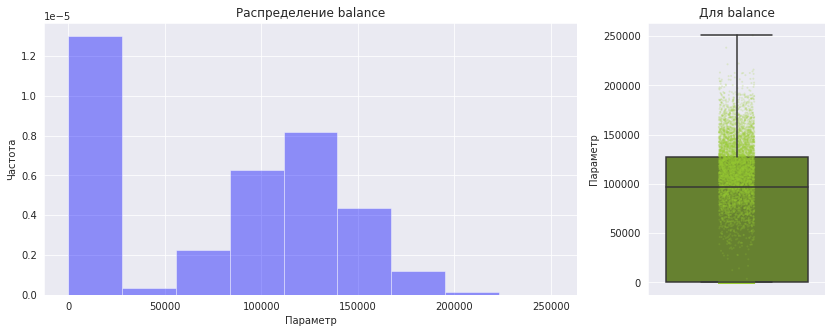

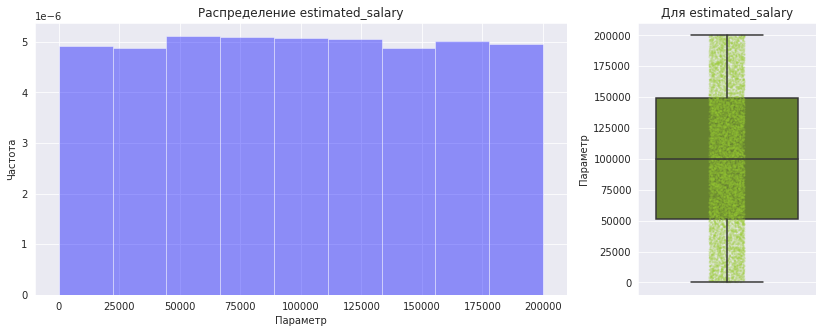

In [26]:
listing = ['score', 'age', 'balance', 'estimated_salary']

for col in listing:
    parameters(client_info, col)

На полученных графиках видим, что параметы имеют распределение близкое к нормальному

In [27]:
parameters_с = ['city', 'gender', 'creditcard', 'loyalty', 'products', 'objects']

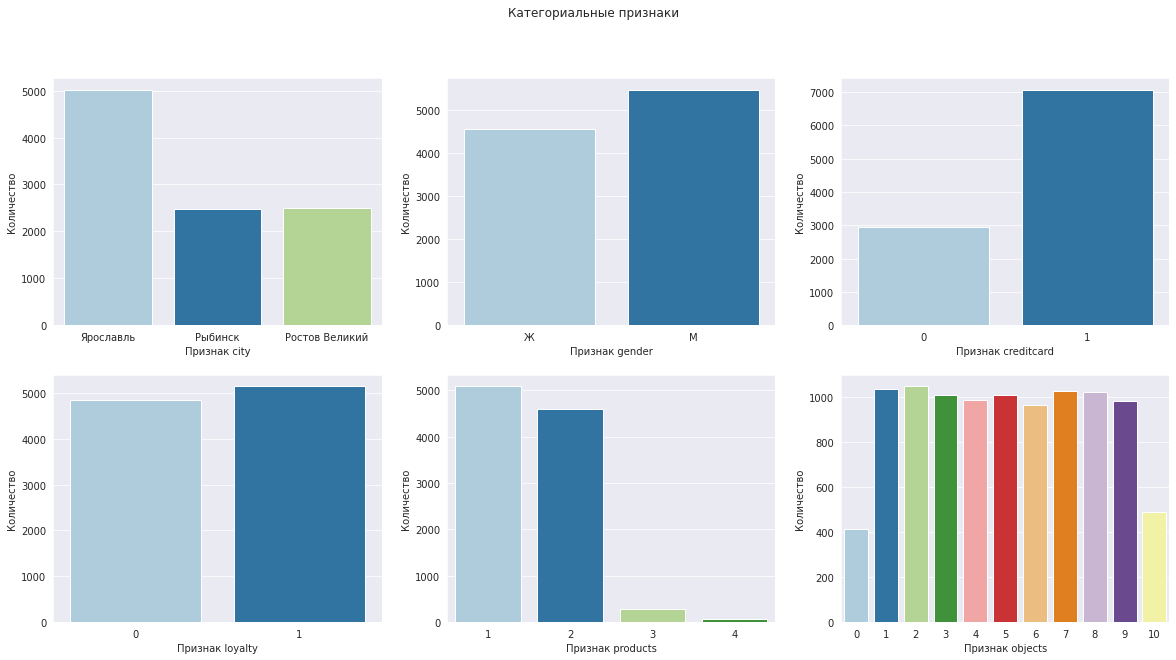

In [28]:
fig, ax = plt.subplots(2, int(len(parameters_с)/2), figsize=(20, 10))
for variable, subplot in zip(parameters_с, ax.flatten()):
    sns.countplot(client_info[variable], ax=subplot, palette="Paired")
    subplot.set_ylabel('Количество')
    subplot.set_xlabel('Признак {}'.format(variable))
fig.suptitle("Категориальные признаки")
plt.show()

На полученных графиках видим:

1. Самое большое количество клиентов банка из Ярославля;
2. Клиентов мужчин больше;
3. Большое количество клиентов банка пользуется кредитными картами;
4. Клиенты банка анктивные и неактивные распределены практически по ровну;
5. Клиенты банка чаще всего пользуютмся 1 или 2 продуктами банка;
6. Количество объектов в собственности у клиентов банка распределено практически равномерно (от 1 до 9) 

Корреляция

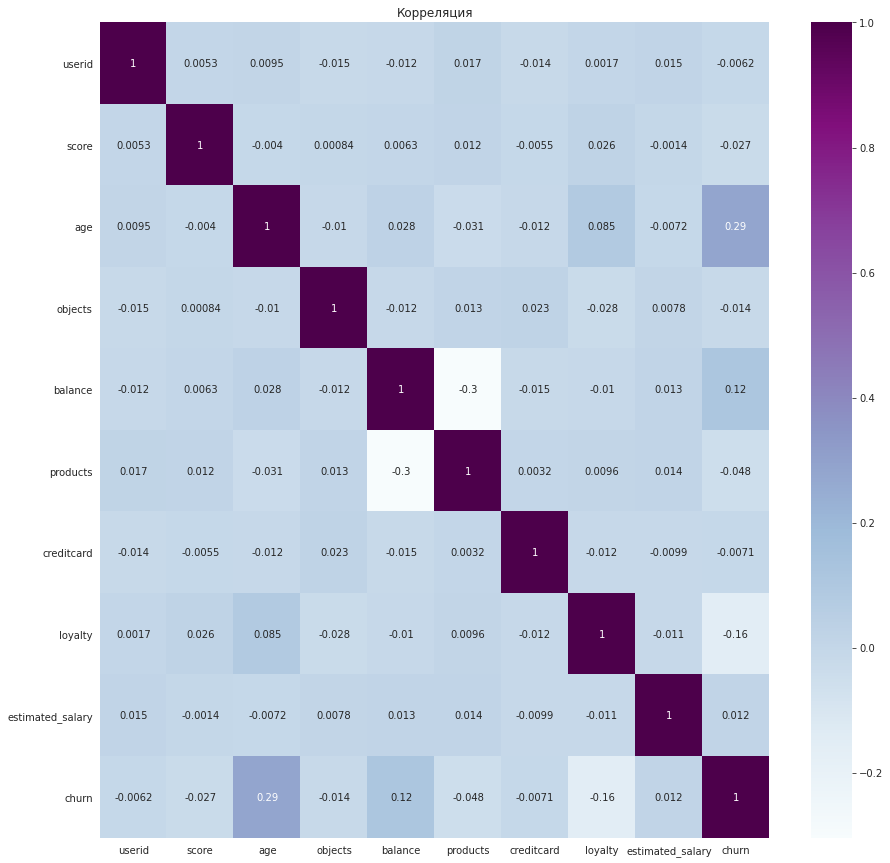

In [29]:
plt.figure(figsize = (15,15))
sns.heatmap(client_info.corr(), annot=True, cmap="BuPu")
plt.title('Корреляция')
plt.show()

На основе анализа данных видим, что корреляции между параметрами слабая.
Отток клиентав сильнее всего коррелирует с возрастам, лояльностью, количеством продуктов банка и уровнем баланса

Составим портрет клиента склонного к оттоку

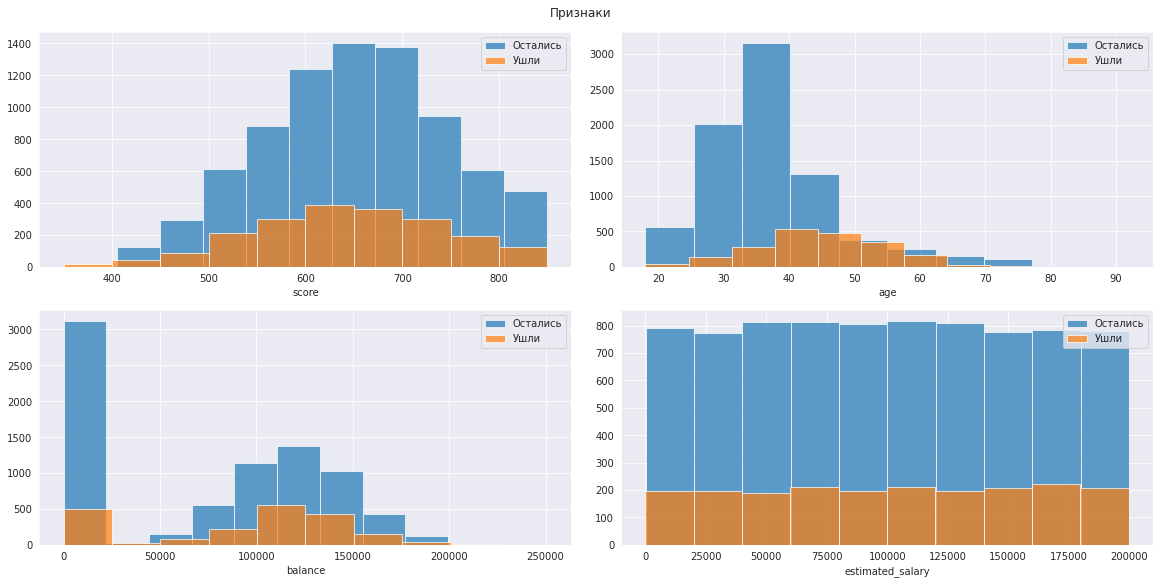

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), constrained_layout=True)

for col, col_name in enumerate(listing):
    client_info.query('churn == 0')[col_name].hist(alpha=0.7, label='Остались', ax=axes[col // 2, col % 2])
    client_info.query('churn == 1')[col_name].hist(alpha=0.7, label='Ушли', ax=axes[col // 2, col % 2])
    axes[col // 2, col % 2].set_xlabel(col_name)
    axes[col // 2, col % 2].legend() 
fig.suptitle('Признаки');
           

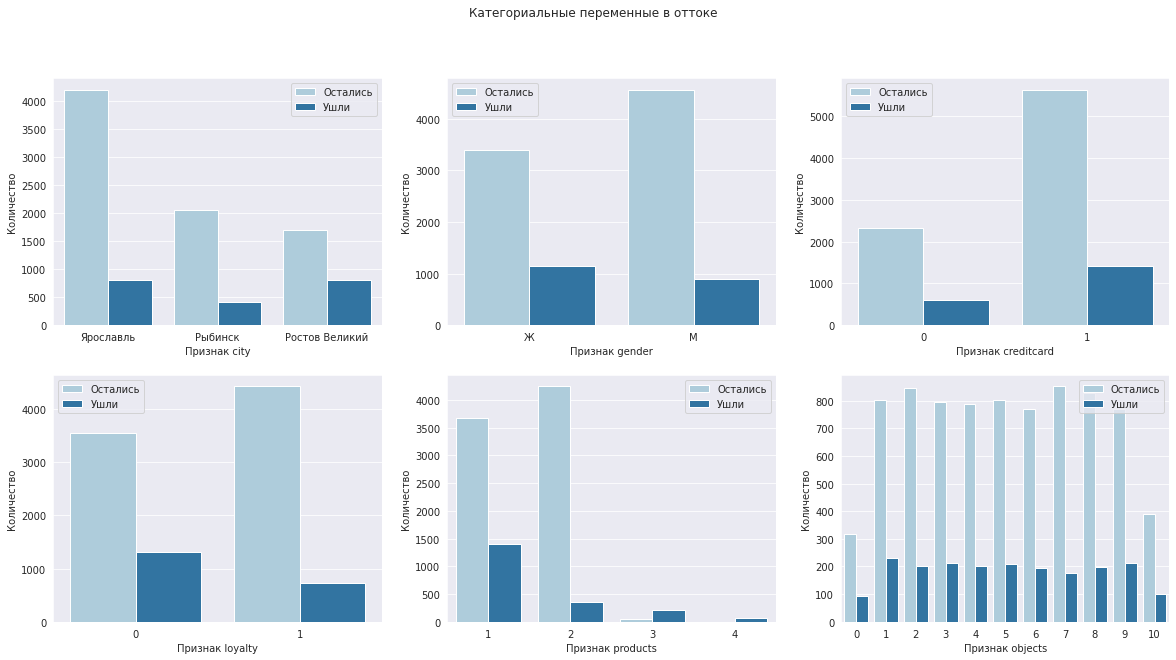

In [31]:
fig, ax = plt.subplots(2, int(len(parameters_с)/2), figsize=(20, 10))
for variable, subplot in zip(parameters_с, ax.flatten()):
    sns.countplot(data=client_info, x=variable, hue='churn', ax=subplot, palette="Paired")
    subplot.set_ylabel('Количество')
    subplot.set_xlabel('Признак {}'.format(variable))
    subplot.legend(labels=['Остались', 'Ушли'])
fig.suptitle("Категориальные переменные в оттоке");

На основании полученных графиков можно сделать следующие выводы:
1. Чаще уходят клиенты старше 40 лет;
2. С балансом на счете ниже среднего;
3. Чаще всего к оттоку склонны женщины;
4. Клиенты пользующиеся одним продуктов так же уходят чаще, тех кто пользульзуется двумя

# 4. Кластеризация клиентов

Кластеризация клиентов позволит выделить несколько категорий клиентов, что позволит сформировать для каждой категории наиболее оптимальное коммерческое предложение от банка

In [50]:
client_info_a = client_info.copy()
client_info_a['city_n'] = client_info_a['city']
client_info_a['gender_n'] = client_info_a['gender']
client_info_a = pd.get_dummies(client_info_a, columns=['gender_n','city_n'])
display(client_info_a.head())

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_n_Ж,gender_n_М,city_n_Ростов Великий,city_n_Рыбинск,city_n_Ярославль
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1,1,0,0,0,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0,1,0,0,0,1
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0


In [51]:
cluster = client_info_a.drop(columns=['userid', 'city','gender'])

In [52]:
sc = StandardScaler()
X_sc = sc.fit_transform(cluster)

linked = linkage(X_sc, method = 'ward') 

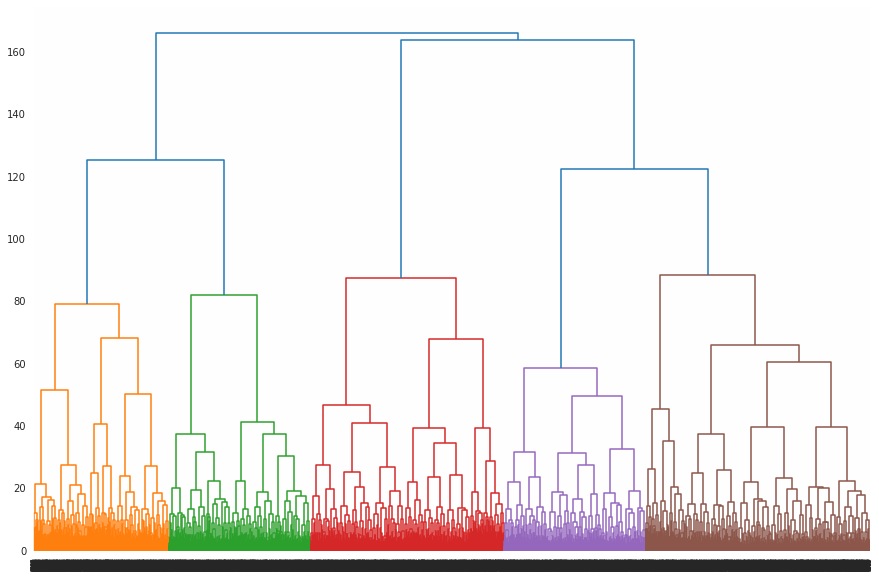

In [53]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

Из полученного графика видим, что можно выделить четыре кластера. Далее можно запустить более быстрый алгоритм K-Means

In [36]:
KM = KMeans(n_clusters = 4, random_state=0) 
labels = KM.fit_predict(X_sc)

In [37]:
cluster['cluster'] = labels
cluster.groupby('cluster').agg('mean')

,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_n_Ж,gender_n_М,city_n_Ростов Великий,city_n_Рыбинск,city_n_Ярославль
cluster,,,,,,,,,,,,,,
0,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734,0.439645,0.560355,0.0,1.0,0.0
1,649.185759,38.773994,4.950022,60322.670159,1.547545,0.697921,0.513932,99564.252755,0.203450,1.000000,0.000000,0.0,0.0,1.0
2,650.064657,38.296404,5.049401,63546.284875,1.517254,0.713767,0.519070,100174.252495,0.127134,0.000000,1.000000,0.0,0.0,1.0
3,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432,0.475488,0.524512,1.0,0.0,0.0


In [38]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

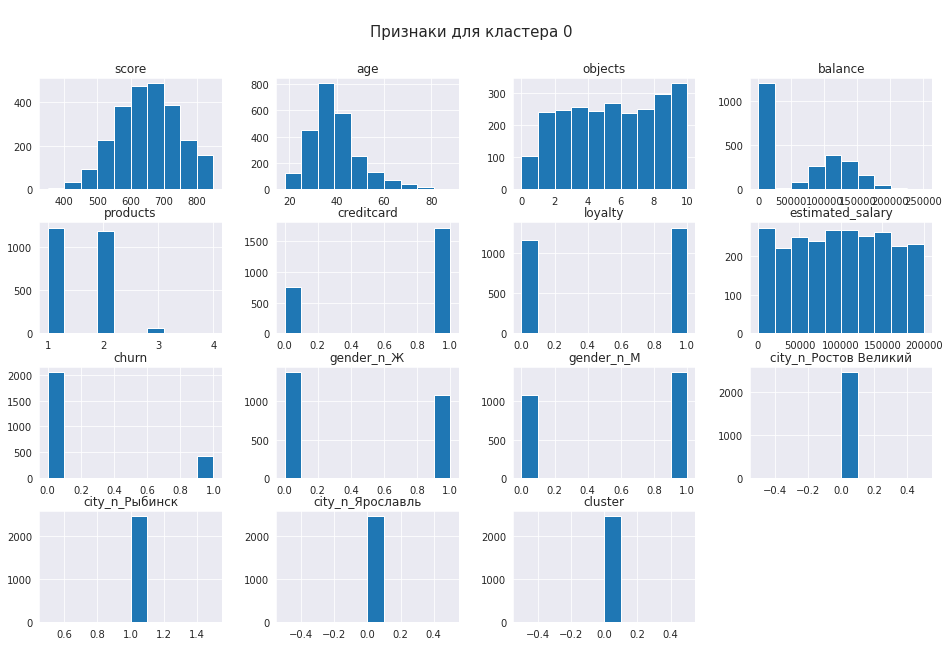

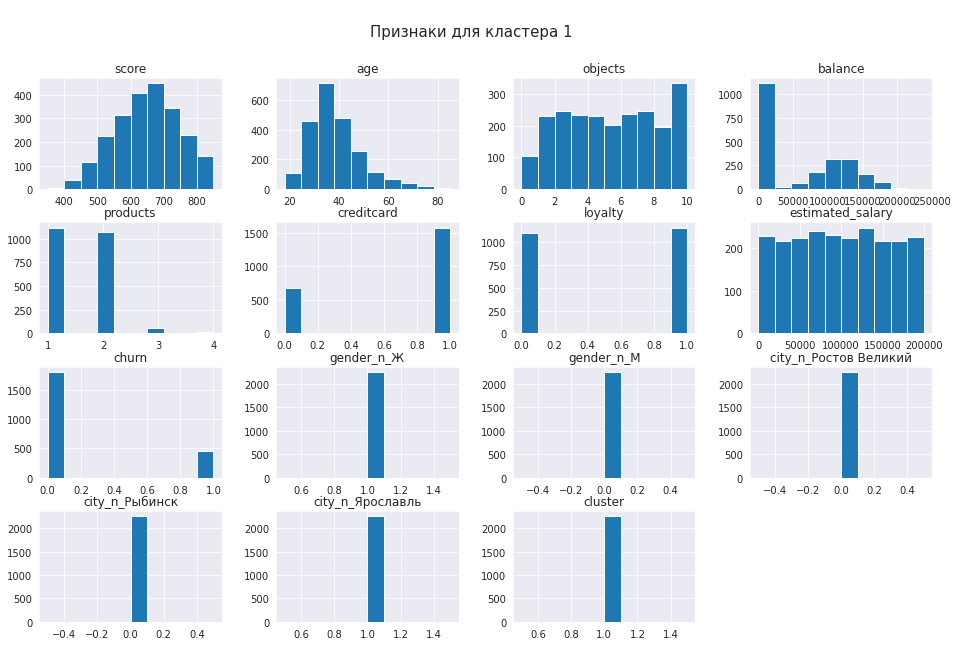

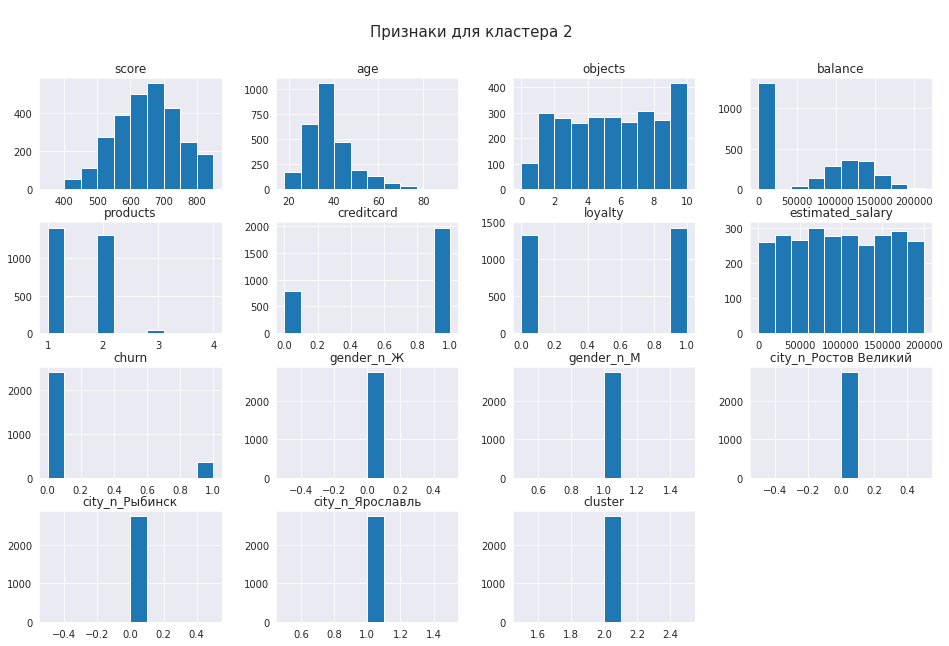

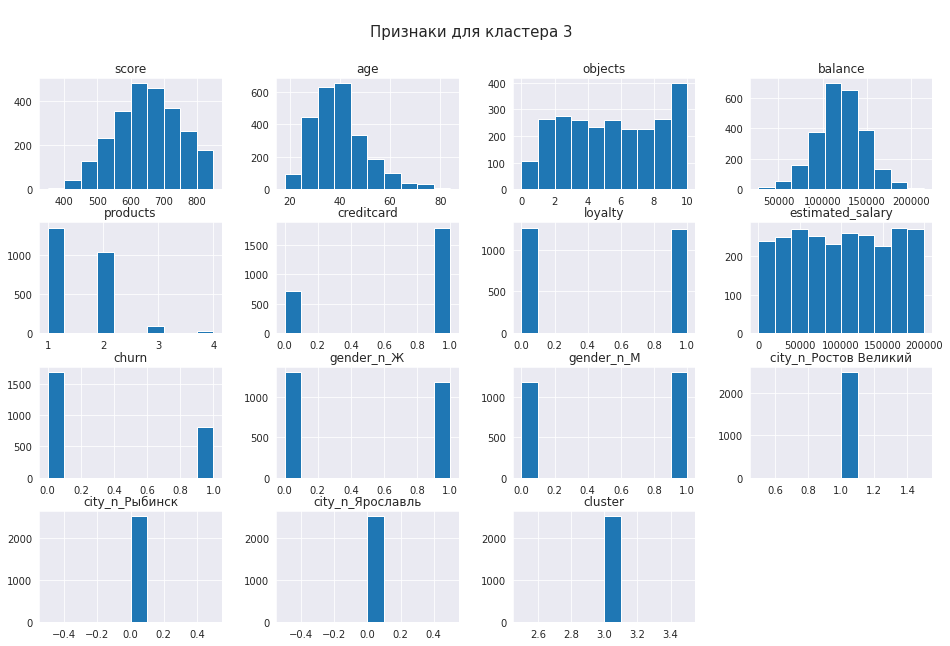

In [39]:
for value in [0, 1, 2, 3,]:
    cluster[cluster['cluster']==value].hist(figsize=(16,10))
    plt.suptitle('\nПризнаки для кластера {}'.format(value), fontsize = 15)
    plt.show()

На основании разделения на кластеры и полученных графиков можно сделать следующее выводы:

1. Кластер 0 - клиенты проживают в Ростове Великом. Распределение между мужчинами и женщинами примерно равное (52% мужчин и 48% женщин). Средний баланс на счете - 120 тысяч рублей. Клиенты данного кластера больше всего склонны к оттоку - 32%. Средняя зарплата у клиентов - 101 тысяча рублей. 49% - лояльные пользователи. В среднем у них 1-2 продукта и 5 объектов в собственности. Среднее число баллов скоринга - 651.
2. кластер 1 - клиенты проживают в Ярославле. Данные в кластеры представлены по клинтам женского пола. Средний баланс на счете - 60 тысяч рублей. Процент оттока - 20%. Средняя зарплата у клиентов - 100 тысяч рублей. 51% - лояльные пользователи. В среднем у них 1-2 продукта и 5 объектов в собственности. Среднее число баллов скоринга - 649.
3. кластер 2 - клиенты проживают в Ярославле. Данные в кластеры представлены по клинтам мужского пола. Средний баланс на счете - 64 тысяч рублей. Процент оттока самый низкий - 13%. Средняя зарплата у клиентов - 100 тысяч рублей. 52% - лояльные пользователи. В среднем у них 1-2 продукта и 5 объектов в собственности. Среднее число баллов скоринга - 650.
4. кластер 3 - клиенты проживают в Рыбинске. Распределение между мужчинами и женщинами примерно равное (56% мужчин и 44% женщин). Средний баланс на счете - 62 тысячи рублей. Процент оттока небольшой - 16%. Средняя зарплата у клиентов - 99 тысяч рублей. 53% - лояльные пользователи. В среднем у них 1-2 продукта и 5 объектов в собственности. Среднее число баллов скоринга - 651.

# 5. Проверка гипотиз

## 5.1 Гипотиза различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

Проверим гипотезу различия дохода между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Сформултруем гипотизу H0:

- Доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, равны

Исходя из Н0 сформулируем альтернативную гипотизу Н1:

- Доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, различаются

Пороговое значение alpha примем за 5%.

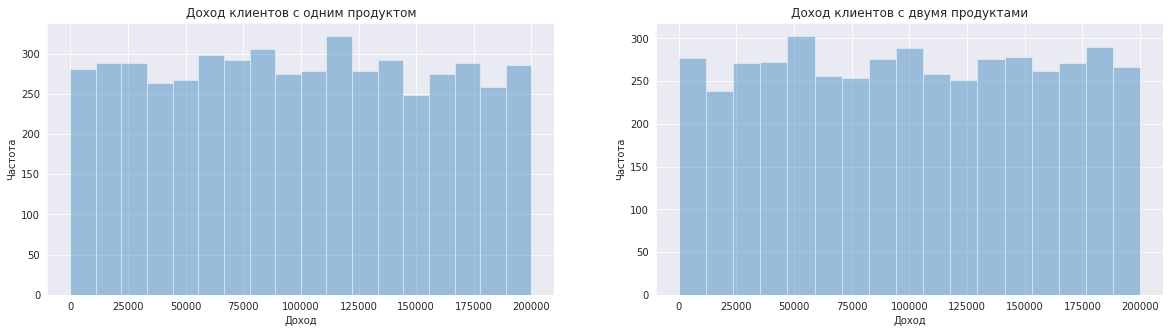

In [40]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))

sns.distplot(client_info.query('products == 1')['estimated_salary'], kde=False, ax=ax1)
ax1.set_title("Доход клиентов c одним продуктом")
ax1.set_ylabel('Частота')
ax1.set_xlabel('Доход')

sns.distplot(client_info.query('products == 2')['estimated_salary'], kde=False, ax=ax2)
ax2.set_title("Доход клиентов с двумя продуктами")
ax2.set_ylabel('Частота')
ax2.set_xlabel('Доход')

plt.show()

Применим метод Манна—Уитни для оценки различий между двумя независимыми выборками и проверки нормального распределения.

In [41]:
alpha = 0.05

results = st.mannwhitneyu(
    client_info.query('products == 1')['estimated_salary'], 
    client_info.query('products == 2')['estimated_salary'], 
    alternative = 'two-sided')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4079566651927651
Не получилось отвергнуть нулевую гипотезу


Не удалось отвергнуть нулевую гипотезу: доходы клиентов, которые пользуются двумя продуктами банка, и теми, которые пользуются одним, не различаются.

## 5.2 Гипотеза оттока между теми клиентами, которые пользуются двумя и более продуктами банка, и теми, которые пользуются одним

Проверим гипотезу различия оттока между теми клиентами, которые пользуются двумя и более продуктами банка, и теми, которые пользуются одним.

Сформултруем гипотизу H0:

- Отток клиентов, которые пользуются двумя и более продуктами банка, и отток тех, которые пользуются одним, равны

Исходя из Н0 сформулируем альтернативную гипотизу Н1:

- Отток клиентов, которые пользуются двумя и более продуктами банка, и отток тех, которые пользуются одним, различаются

Пороговое значение alpha примем за 5%.

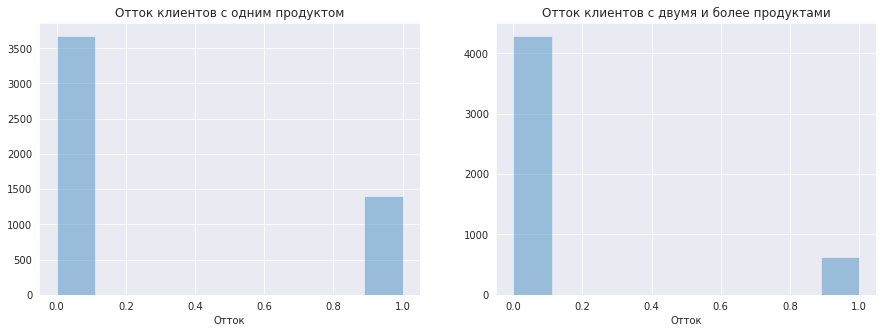

In [42]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

bins_range = np.linspace(0, 1, 10)
    
sns.distplot(client_info.query('products == 1')['churn'], kde=False, ax=ax1, bins = bins_range)
ax1.set_title("Отток клиентов c одним продуктом")
ax1.set(ylabel=None)
ax1.set_xlabel('Отток')

sns.distplot(client_info.query('products > 1')['churn'], kde=False, ax=ax2, bins = bins_range)
ax2.set_title("Отток клиентов с двумя и более продуктами")
ax2.set(ylabel=None)
ax2.set_xlabel('Отток')

plt.show()

Так как churn - величина бинарная, будет оптимальным использование Z-критерия для сравнения долей.

In [43]:
alpha = 0.05

from statsmodels.stats import weightstats as stests

results, pvalue = stests.ztest(
    client_info.query('products == 1')['churn'], 
    x2=client_info.query('products > 1')['churn'],
    value = 0,
    alternative='two-sided')

print('p-значение:', float(pvalue))

if (pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")           
                  

p-значение: 2.0079099625883425e-79
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу: отток клиентов, которые пользуются двумя и более продуктами банка, и отток тех, которые пользуются одним, различаются.

Приведенный пример на правктике удалось применить только если сменить формулировку второй гипотизы в проекте. Выглядит это так:

## 5.3 Гипотеза оттока между лояльными и нелояльными клиентами банка

Проверим гипотезу различия оттока между лояльными и нелояльными клиентами банка.

Сформултруем гипотизу H0:

- Доли оттока среди лояльных и нелояльных клиентов равны

Исходя из Н0 сформулируем альтернативную гипотизу Н1:

- Доли оттока среди лояльных и нелояльных клиентов различаются

Пороговое значение alpha примем за 5%.

In [49]:
def test(dep_col, ind_col, alpha):
    
    group_size = client_info[ind_col].value_counts()
    share_size = client_info.groupby(ind_col)[dep_col].sum() 
   
    
    p = share_size / group_size
    p_combined = share_size.sum() / group_size.sum()
    
    difference = p[0] - p[1]
    
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/group_size[0] + 1/group_size[1]))

    distr = st.norm(0, 1) 

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print(f'Уровень значимости: {alpha}')
    print('p-значение: {0:0.3f}'.format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

test('churn', 'loyalty', .05)

Уровень значимости: 0.05
p-значение: 0.000
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу: доли оттока среди лояльных и нелояльных клиентов различаются.

# 6. Общие выводы и рекомендации

В проекте был проведен анализ данных о клиентах банка «Метанпромбанк».

## Общие выводы

На основании проведенного анализа клиентов банка можно разделить на следующие группы:
1. клиенты более склонные к оттоку (32%), проживают в Ростове Великом, средний баланс на счете у них - 120 тысяч рублей, средняя зарплата - 101 тысяча рублей. В среднем у них 1-2 продукта и 5 объектов собственности.
2. клиенты менее склонны к оттоку (16%), проживают в Рыбинске, средний баланс - 62 тысячи рублей. В среднем у клиентов 1-2 продукта и 5 объектов в собственности. Средняя зарплата - 99 тысяч рублей.
3. клиенты менее склонны к оттоку (14-18%), проживают в Ярославле. В среднем у таких клиентов 2 продукта и 5 объектов в собственности.Средний баланс на счете у них - 60 - 65 тысяч рублей, средняя зарплата - 100 тысяч рублей.

Также удалось составить портрет клиенты более склонного к оттоку:
1. Чаще уходят клиенты старше 40 лет;
2. С балансом на счете ниже среднего;
3. Чаще всего к оттоку склонны женщины;
4. Клиенты пользующиеся одним продуктов так же уходят чаще, тех кто пользульзуется двумя

## Рекомендации

1. Если у клиента не указан баланс, и он является потребителем услуги, не предполагающей наличие дебетового счета, то он менее склонен к оттоку. Если у них долгосрочный банковский продукт, такие клиенты остаются с банком на довольно продолжительный срок, поэтому у банка есть отличная возможность заслужить лояльность таких клиентов, а также предложить им продукты, предполагающие наличие дебетового счета (вклады, дебетовые карты, зарплатные проекты и т.д.).
2. В Ростове Великом довольно большой отток клиентов, стоит обратить внимание на данный филиал, с целью повышения лояльности клиентов.
3. В Ростове Великом довольно большое число клиентов не имеющих объектов с собственности. Возможно стоит разработать для данных клиентов специальные предложения по ипотечным программам.
4. Клиентам из Рыбинска можно порекомендовать продукты, предполагающие наличие дебетового счета. Сформировать для корпоротивных клиентов данного города специальные предложения открытию зарплатных проекторв для их сотрудников.
5. В целом, большинство клиентов - это владельцы 1-2 продуктов (в Ярославле много клиентов, у кого 2 продукта, в Рыбинске и Ростове большинство с 1 продуктом), поэтому следует направить внимание на увеличение числа продуктов для уже имеющихся клиентов, так как они по большей части лояльны к банку и более охотно воспользуются дополнительными продуктами, чем те, кто еще не является клиентом банка. Наибольший доход банку приносят именно такие клиенты, поскольку они пользуются большим количеством продуктов.
6. Судя по данным, клиентами банка являются люди возраста 37-45 лет. Стоит направить внимание на привлечение клиентов других возрастных сегментов, например, молодых людей (возраст 25-35) со стабильным доходом, для них возможно запустить как специальные программы по ипотеке (например направленные на молодые семьи с детьми) или инвестиционные программы. Так же возможно разработать специальные программы для людей старшего возраста, например дебитовые карты с повышенным кешбеком для получения пенсии.